In [1]:
import mysql.connector
import pandas as pd
import numpy as np


In [2]:
import matplotlib as plt
import seaborn as sns

In [3]:
mydb=mysql.connector.connect(host="localhost",port=3306,database='studentmarks',user="root",password="abcd1234")

In [4]:
df=pd.read_sql_query("SELECT * from marks", mydb)
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,1988-05-04,55,45,56,87,21,52,89,65
1,Suresh,M,1987-04-05,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-25-05,25,54,89,76,95,87,56,74
3,Jessica,F,1990-12-08,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-02-09,58,96,78,46,96,77,83,53
5,Annu,F,1988-05-04,45,87,52,89,55,89,87,52
6,pooja,F,1987-04-05,55,64,61,58,75,58,64,61
7,Ritesh,M,1989-25-05,54,76,87,56,25,56,76,87
8,Farha,F,1990-12-08,55,63,89,75,78,75,63,89
9,Mukesh,M,1989-02-09,96,46,77,83,58,83,46,77


In [5]:
#Adding the target column 'Result' which denotes 'F' for Fail and 'P' for Pass to the data
df['Result']=['F','F','F','P','P','P','P','F','P','P']
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Result
0,John,M,1988-05-04,55,45,56,87,21,52,89,65,F
1,Suresh,M,1987-04-05,75,96,78,64,90,61,58,2,F
2,Ramesh,M,1989-25-05,25,54,89,76,95,87,56,74,F
3,Jessica,F,1990-12-08,78,96,86,63,54,89,75,45,P
4,Jennifer,F,1989-02-09,58,96,78,46,96,77,83,53,P
5,Annu,F,1988-05-04,45,87,52,89,55,89,87,52,P
6,pooja,F,1987-04-05,55,64,61,58,75,58,64,61,P
7,Ritesh,M,1989-25-05,54,76,87,56,25,56,76,87,F
8,Farha,F,1990-12-08,55,63,89,75,78,75,63,89,P
9,Mukesh,M,1989-02-09,96,46,77,83,58,83,46,77,P


Problem Statement:-
1. The dataset contains the data of 10 students whose score in the 8 subjects 'Maths', 'Physics', 'Chemistry', 'English', 'Biology', 'Economics', 'History' and 'Civics' are given.
2. We need to analyse the data and build a model to predict the result. We will have to build classification model since the target is either 'F' or 'P'.


In [6]:
#Checking the data shape
df.shape
#There are 10 rows and 12 columns in the dataset

(10, 12)

In [7]:
#Checking the data type
df.dtypes

Name         object
Gender       object
DOB          object
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
Result       object
dtype: object

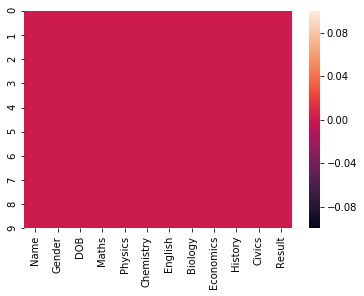

In [8]:
#Checking for null values
sns.heatmap(df.isnull())

In [9]:
df.isnull().sum()
#There are no null values in the dataset

Name         0
Gender       0
DOB          0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
Result       0
dtype: int64

## Univariate Analysis

In [10]:
df.columns

Index(['Name', 'Gender', 'DOB', 'Maths', 'Physics', 'Chemistry', 'English',
       'Biology', 'Economics', 'History', 'Civics', 'Result'],
      dtype='object')

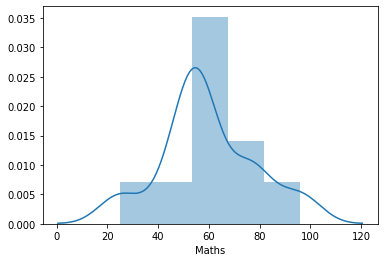

In [11]:

sns.distplot(df['Maths'])
#Many students have scored between 60 and 70

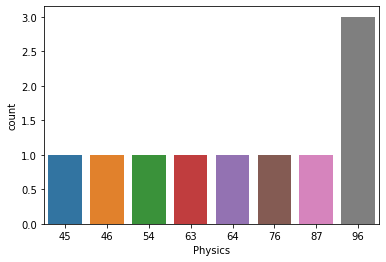

In [12]:
sns.countplot(df['Physics'])
#Many students have scored 96

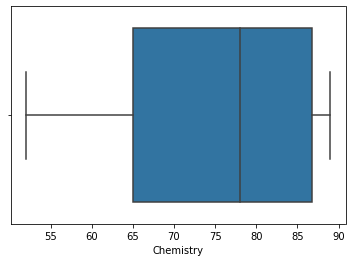

In [13]:
sns.boxplot(df['Chemistry'])
#The minimum marks is 52. Maximum is 89 and no outliers

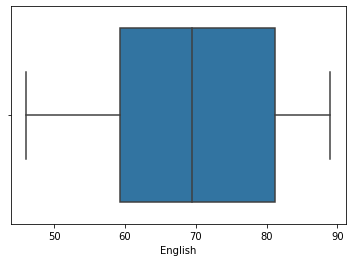

In [14]:
sns.boxplot(df['English'])

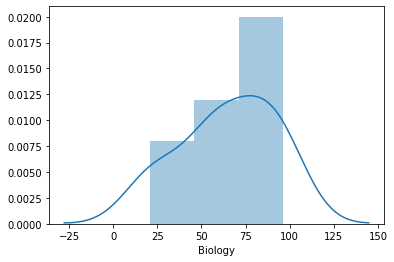

In [15]:
sns.distplot(df['Biology'])
#Many students have scored between 75 and 98.

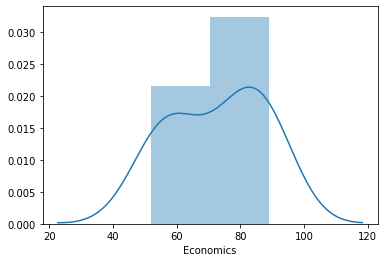

In [16]:
sns.distplot(df['Economics'])

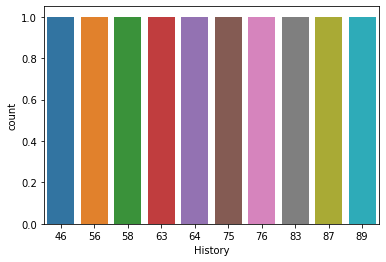

In [17]:
sns.countplot(df['History'])
#There are no repetitions of marks

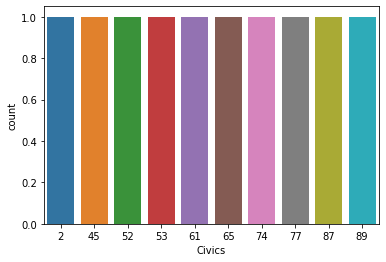

In [18]:
sns.countplot(df['Civics'])
#all marks are unique and not repetitive

# Statistical Analysis 

In [19]:
df.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


#Observations
1. Maths has minimum 25 marks, Biology 21 marks and Civics 2 marks.
2. Rest all have more than 35% marks which is the benchmark for pass.
3. Students have scored 96 in Maths, Physics and Biology.
4. The average marks for all subjects are around 60%-73%.

In [20]:
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Result
0,John,M,1988-05-04,55,45,56,87,21,52,89,65,F
1,Suresh,M,1987-04-05,75,96,78,64,90,61,58,2,F
2,Ramesh,M,1989-25-05,25,54,89,76,95,87,56,74,F
3,Jessica,F,1990-12-08,78,96,86,63,54,89,75,45,P
4,Jennifer,F,1989-02-09,58,96,78,46,96,77,83,53,P
5,Annu,F,1988-05-04,45,87,52,89,55,89,87,52,P
6,pooja,F,1987-04-05,55,64,61,58,75,58,64,61,P
7,Ritesh,M,1989-25-05,54,76,87,56,25,56,76,87,F
8,Farha,F,1990-12-08,55,63,89,75,78,75,63,89,P
9,Mukesh,M,1989-02-09,96,46,77,83,58,83,46,77,P


In [21]:
marks=df.groupby('Name').mean()
marks

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
Name,,,,,,,,
Annu,45,87,52,89,55,89,87,52
Farha,55,63,89,75,78,75,63,89
Jennifer,58,96,78,46,96,77,83,53
Jessica,78,96,86,63,54,89,75,45
John,55,45,56,87,21,52,89,65
Mukesh,96,46,77,83,58,83,46,77
Ramesh,25,54,89,76,95,87,56,74
Ritesh,54,76,87,56,25,56,76,87
Suresh,75,96,78,64,90,61,58,2


In [22]:
subsum=marks.sum(axis=0)
subsum

Maths        596
Physics      723
Chemistry    753
English      697
Biology      647
Economics    727
History      697
Civics       605
dtype: int64

Observations:
1. Students have scored most in Chemistry with 753 highest total.
2. Students have scored least in Maths with 596 total.


In [23]:
markssum=marks.sum(axis=1)
markssum

Name
Annu        556
Farha       587
Jennifer    587
Jessica     586
John        470
Mukesh      566
Ramesh      556
Ritesh      517
Suresh      524
pooja       496
dtype: int64

#Observations:
1. Farha and Jennifer have scored highest with 587 marks or 58.7 average marks.
2. John has scored least with 470 marks followed by Pooja with 496 marks.

## Bivariate Analysis

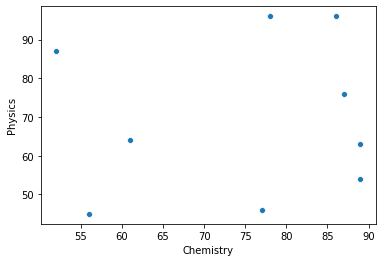

In [24]:
sns.scatterplot(x='Chemistry',y='Physics',data=df)

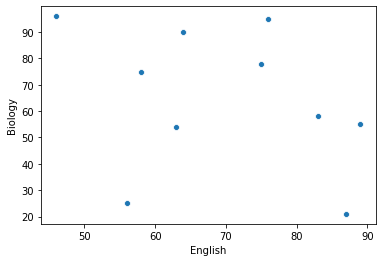

In [25]:
sns.scatterplot(x='English',y='Biology',data=df)

In [26]:
df.corr()


,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
Maths,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629
Physics,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266
Chemistry,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908
English,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705
Biology,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060
Economics,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905
History,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686
Civics,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000


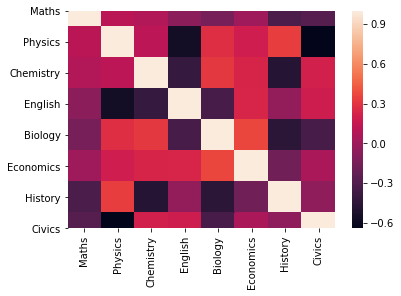

In [27]:
sns.heatmap(df.corr())

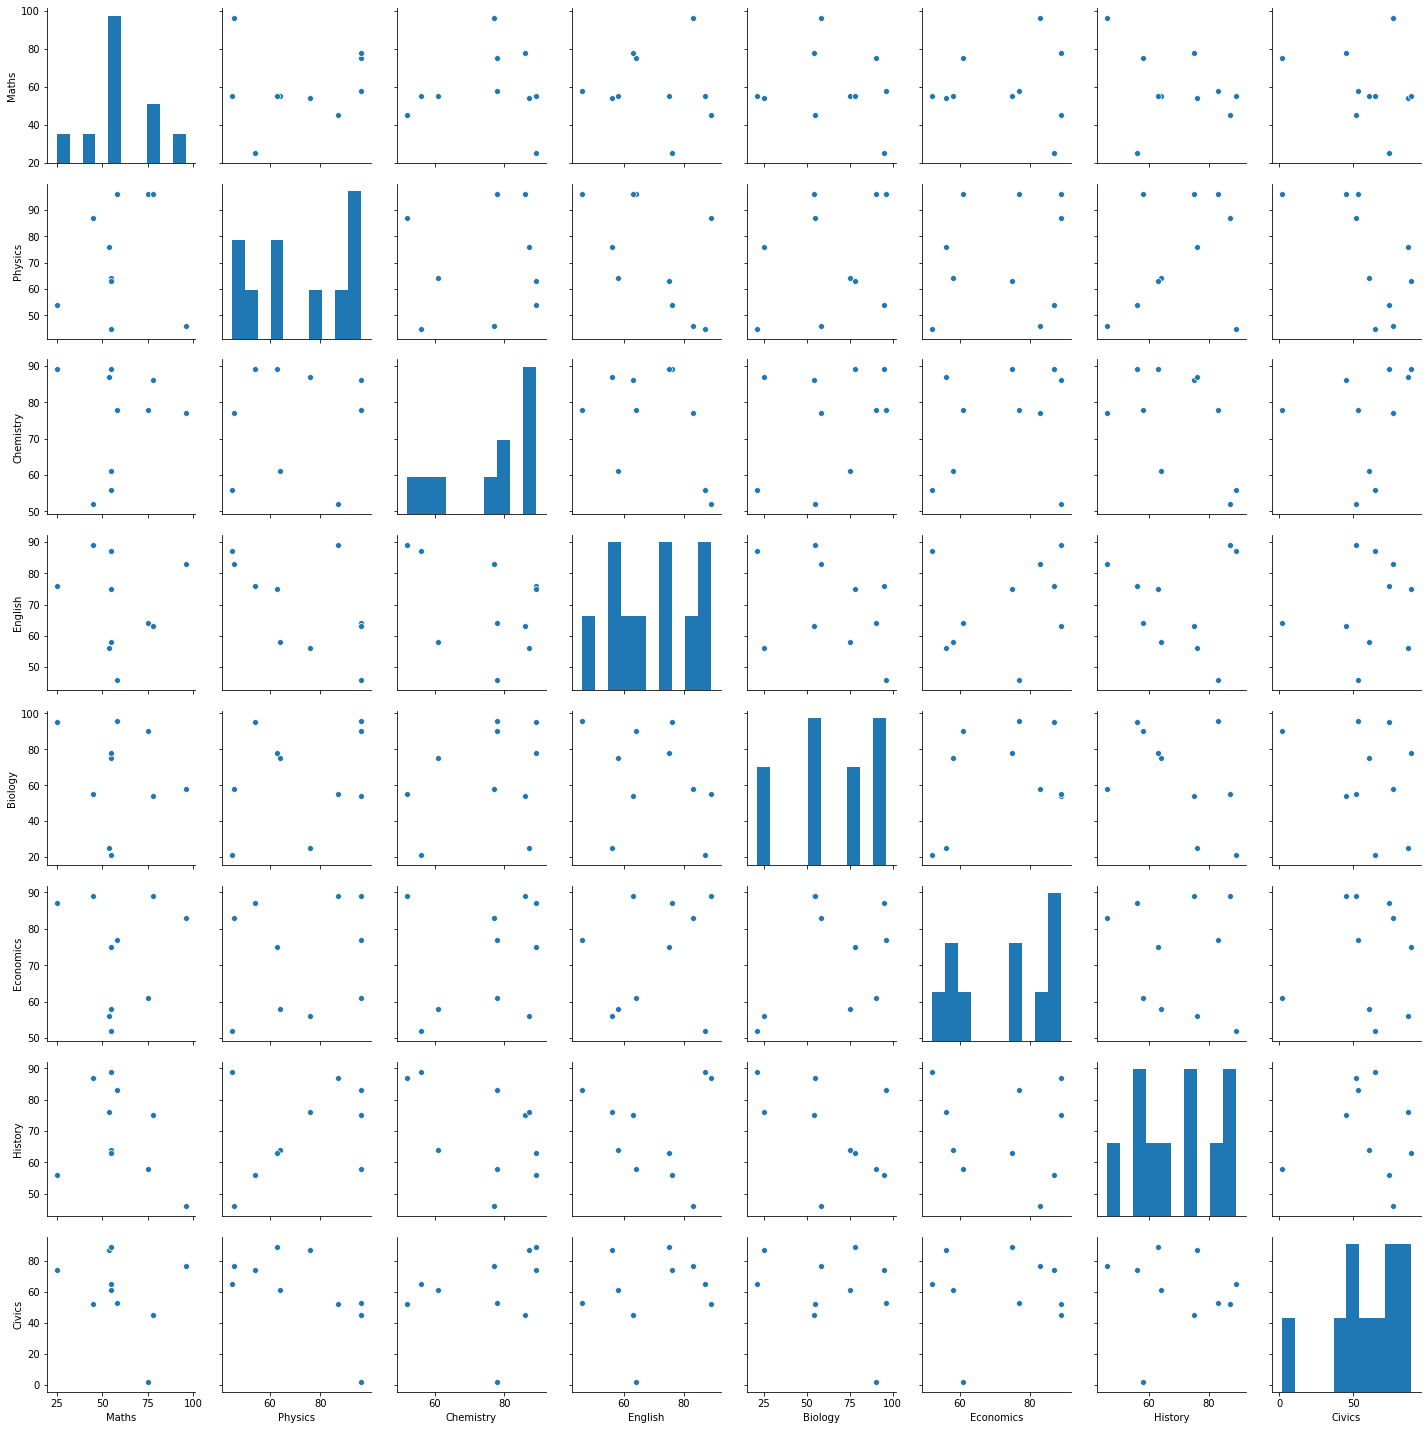

In [28]:
sns.pairplot(df)

# Pre-processing Data

Using LabelEncoder


In [29]:
#deleting columns which are not required
df.drop(['Name'],axis=1,inplace=True)

In [30]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Gender']=pd.DataFrame(lb.fit_transform(df['Gender']))
df['DOB']=pd.DataFrame(lb.fit_transform(df['DOB']))
df['Result']=pd.DataFrame(lb.fit_transform(df['Result']))
#Result Fail has transformed to 0 and Pass to 1.

In [31]:
df

,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Result
0,1,1,55,45,56,87,21,52,89,65,0
1,1,0,75,96,78,64,90,61,58,2,0
2,1,3,25,54,89,76,95,87,56,74,0
3,0,4,78,96,86,63,54,89,75,45,1
4,0,2,58,96,78,46,96,77,83,53,1
5,0,1,45,87,52,89,55,89,87,52,1
6,0,0,55,64,61,58,75,58,64,61,1
7,1,3,54,76,87,56,25,56,76,87,0
8,0,4,55,63,89,75,78,75,63,89,1
9,1,2,96,46,77,83,58,83,46,77,1


Separating the target and input variables

In [32]:
x=df.iloc[:,0:-1]
y=pd.DataFrame(df.iloc[:,-1])
print(x.shape)
print(y.shape)

(10, 10)
(10, 1)


Using StandardScaler

In [33]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x.iloc[:,2:]))
x

,0,1,2,3,4,5,6,7
0,-0.249162,-1.392767,-1.453101,1.261699,-1.706185,-1.491526,1.407560,0.187167
1,0.834152,1.209105,0.203284,-0.415704,0.987792,-0.843037,-0.853288,-2.433174
2,-1.874135,-0.933613,1.031476,0.459463,1.183007,1.030378,-0.999149,0.561502
3,0.996650,1.209105,0.805605,-0.488635,-0.417762,1.174487,0.386532,-0.644687
4,-0.086665,1.209105,0.203284,-1.728454,1.222050,0.309834,0.969976,-0.311945
5,-0.790820,0.749951,-1.754261,1.407560,-0.378718,1.174487,1.261699,-0.353538
6,-0.249162,-0.423442,-1.076650,-0.853288,0.402144,-1.059200,-0.415704,0.020796
7,-0.303328,0.188763,0.880895,-0.999149,-1.550013,-1.203309,0.459463,1.102207
8,-0.249162,-0.474459,1.031476,0.386532,0.519274,0.165725,-0.488635,1.185392
9,1.971633,-1.341749,0.127993,0.969976,-0.261589,0.742160,-1.728454,0.686280


### Train test split
We need to split the data into train, test and split by selecting the best random_state

In [34]:
#import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [35]:
#selecting the best parameters

def max_acc_score(reg,x,y):
    max_acc_score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.30)
        lg=LogisticRegression()
        lg.fit(train_x,train_y)
        pred=lg.predict(test_x)
        accscore=accuracy_score(test_y,pred)
        print("The accuracy score attained at r state", r_state, "is", accscore)
        if accscore>max_acc_score:
            max_acc_score=accscore
            final_r_state=r_state
    print("The maximum accuracy score attained at final r state", final_r_state, "is", max_acc_score)
    return final_r_state

In [36]:
#Let use Logistic Regression and check max r2 score corresponding to different random states
lg=LogisticRegression()
r_state=max_acc_score(lg,x,y)

The accuracy score attained at r state 42 is 0.0
The accuracy score attained at r state 43 is 0.3333333333333333
The accuracy score attained at r state 44 is 0.3333333333333333
The accuracy score attained at r state 45 is 0.3333333333333333
The accuracy score attained at r state 46 is 0.0
The accuracy score attained at r state 47 is 0.3333333333333333
The accuracy score attained at r state 48 is 0.0
The accuracy score attained at r state 49 is 0.3333333333333333
The accuracy score attained at r state 50 is 0.3333333333333333
The accuracy score attained at r state 51 is 0.3333333333333333
The accuracy score attained at r state 52 is 0.0
The accuracy score attained at r state 53 is 0.3333333333333333
The accuracy score attained at r state 54 is 0.0
The accuracy score attained at r state 55 is 0.3333333333333333
The accuracy score attained at r state 56 is 0.0
The accuracy score attained at r state 57 is 0.3333333333333333
The accuracy score attained at r state 58 is 0.3333333333333333
Th

In [37]:
#finalising the train,test and spilt
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=64,test_size=0.30)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(7, 8)
(7, 1)
(3, 8)
(3, 1)


In [38]:
#Since the accuracy score is less, we need to check the other algorithms. We need to use gridsearchCV to get best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters={'n_neighbors':(1,4),'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute')} 
gdkn=GridSearchCV(knn,parameters)
gdkn.fit(train_x,train_y)
gdkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 1}

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gdt=GridSearchCV(dt,parameters)
gdt.fit(train_x,train_y)
gdt.best_params_

{'criterion': 'gini'}

In [40]:
from sklearn.svm import SVC
svc=SVC()
parameters={'kernel':('rbf','linear'), 'C':(1,10)}
gdsv=GridSearchCV(svc,parameters)
gdsv.fit(train_x,train_y)
gdsv.best_params_

{'C': 1, 'kernel': 'rbf'}

In [41]:
score=[]
cv=[]

algorithm=[LogisticRegression(), KNeighborsClassifier(algorithm='auto', n_neighbors=1), DecisionTreeClassifier(criterion='gini'), SVC(C=1, kernel='rbf')]


for i in algorithm:
    print(i)
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    score.append(acc_score)
    print("The accuracy score is ", acc_score)
    cross_val=cross_val_score(i,x,y,cv=5).mean()
    cv.append(cross_val)
    print("The cross validation score is ", cross_val)
    print()
    print(confusion_matrix(test_y,pred))
    print()
    print(classification_report(test_y,pred))
    

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
The accuracy score is  0.6666666666666666
The cross validation score is  0.2

[[1 1]
 [0 1]]

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
The accuracy score is  0.3333333333333333
The cross validation scor

In [42]:
result=pd.DataFrame({'Model':['LogisticRegression','KNeighborsRegressor','DecisionTreeRegressor','SVR'],'Accuracy Score':score,'Cross_val_score':cv})
result

,Model,Accuracy Score,Cross_val_score
0,LogisticRegression,0.666667,0.200000
1,KNeighborsRegressor,0.333333,0.366667
2,DecisionTreeRegressor,0.333333,0.100000
3,SVR,0.333333,0.633333


In [43]:
#Since the models are not performing well, we can try if ensemble techniques help to get good score
from sklearn.ensemble import GradientBoostingClassifier
gd=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gd,parameters,cv=5)
clf.fit(train_x,train_y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 10}

In [44]:
gd=GradientBoostingClassifier(learning_rate= 0.001, n_estimators= 10)
r_state=max_acc_score(gd,x,y)

The accuracy score attained at r state 42 is 0.0
The accuracy score attained at r state 43 is 0.3333333333333333
The accuracy score attained at r state 44 is 0.3333333333333333
The accuracy score attained at r state 45 is 0.3333333333333333
The accuracy score attained at r state 46 is 0.0
The accuracy score attained at r state 47 is 0.3333333333333333
The accuracy score attained at r state 48 is 0.0
The accuracy score attained at r state 49 is 0.3333333333333333
The accuracy score attained at r state 50 is 0.3333333333333333
The accuracy score attained at r state 51 is 0.3333333333333333
The accuracy score attained at r state 52 is 0.0
The accuracy score attained at r state 53 is 0.3333333333333333
The accuracy score attained at r state 54 is 0.0
The accuracy score attained at r state 55 is 0.3333333333333333
The accuracy score attained at r state 56 is 0.0
The accuracy score attained at r state 57 is 0.3333333333333333
The accuracy score attained at r state 58 is 0.3333333333333333
Th

In [45]:
gbr=GradientBoostingClassifier(learning_rate=0.01,n_estimators=10)
print("cross val score for Gradient boosting Classifier:", cross_val_score(gd,x,y,cv=5,scoring='accuracy').mean())
print("standard deviation in cross val score for Gradient boosting Classifier: ", cross_val_score(gd,x,y,cv=5,scoring='r2').std())

cross val score for Gradient boosting Classifier: 0.6333333333333333
standard deviation in cross val score for Gradient boosting Classifier:  nan


In [46]:
#Now we will have to use Adaboost Regression Algorithm 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
ada_reg=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lg,dt]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(train_x,train_y)
clf.best_params_

{'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=None, splitter='best'),
 'learning_rate': 0.001,
 'n_estimators': 10}

In [47]:
ada_cla=AdaBoostClassifier(base_estimator= dt,learning_rate=0.001,n_estimators=100)
print("Cross val score for Ada boosting Classifier:", cross_val_score(ada_reg,x,y,cv=5,scoring='accuracy').mean())
print("standard deviation in cross val score for Ada boosting Classifier: ", cross_val_score(ada_reg,x,y,cv=5,scoring='accuracy').std())

Cross val score for Ada boosting Classifier: 0.2
standard deviation in cross val score for Ada boosting Classifier:  0.24494897427831783


In [48]:
r_score=max_acc_score(ada_cla,x,y)

The accuracy score attained at r state 42 is 0.0
The accuracy score attained at r state 43 is 0.3333333333333333
The accuracy score attained at r state 44 is 0.3333333333333333
The accuracy score attained at r state 45 is 0.3333333333333333
The accuracy score attained at r state 46 is 0.0
The accuracy score attained at r state 47 is 0.3333333333333333
The accuracy score attained at r state 48 is 0.0
The accuracy score attained at r state 49 is 0.3333333333333333
The accuracy score attained at r state 50 is 0.3333333333333333
The accuracy score attained at r state 51 is 0.3333333333333333
The accuracy score attained at r state 52 is 0.0
The accuracy score attained at r state 53 is 0.3333333333333333
The accuracy score attained at r state 54 is 0.0
The accuracy score attained at r state 55 is 0.3333333333333333
The accuracy score attained at r state 56 is 0.0
The accuracy score attained at r state 57 is 0.3333333333333333
The accuracy score attained at r state 58 is 0.3333333333333333
Th

In [49]:
result2=pd.DataFrame({'Boosters':['GradientBoostRegressor','AdaBoostRegressor'],'Accuracy Score':[0.66,0.66],'Cross_val_score':[0.1,0.1]})
result2

,Boosters,Accuracy Score,Cross_val_score
0,GradientBoostRegressor,0.66,0.1
1,AdaBoostRegressor,0.66,0.1


In [50]:
result

,Model,Accuracy Score,Cross_val_score
0,LogisticRegression,0.666667,0.200000
1,KNeighborsRegressor,0.333333,0.366667
2,DecisionTreeRegressor,0.333333,0.100000
3,SVR,0.333333,0.633333


Both Logistic Regression is giving better accuracy score and cross val score. I will select and finalise the Logistic regression

In [51]:
lg=LogisticRegression()
lg.fit(train_x,train_y)
pred=lg.predict(test_x)
acc_score=accuracy_score(test_y,pred)
print("The accuracy score is", acc_score)
crosscore=cross_val_score(lg,x,y,cv=5).mean()
print("The cross val score is", crosscore)

The accuracy score is 0.6666666666666666
The cross val score is 0.2


In [52]:
#saving the finalised model
from sklearn.externals import joblib
joblib.dump(lg,'Studentmarks.pkl')

['Studentmarks.pkl']